https://towardsdev.com/sentiment-analysis-with-cnn-using-keras-c4debff57fc5

In [28]:
from nltk.tokenize import word_tokenize


import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
from typing_extensions import Text
df= pd.read_csv('/content/drive/MyDrive/4-1_Semester/practice code/Sentiment Analysis/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [30]:
df.sentiment = df.sentiment.apply(lambda x: 0 if x =='negative' else 1)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [31]:
df.columns=['review','sentiment']
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [41]:
from tensorflow.keras.utils import to_categorical
y = df['sentiment']
y = df.iloc[:, -1].values
y = y.astype('int')
print(y)

[1 1 1 ... 0 0 0]


In [48]:
token = Tokenizer()
token.fit_on_texts(df['review'])
token.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'be',
 27: 'one',
 28: 'he',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'so',
 35: 'who',
 36: 'from',
 37: 'like',
 38: 'or',
 39: 'just',
 40: 'her',
 41: 'out',
 42: 'about',
 43: 'if',
 44: "it's",
 45: 'has',
 46: 'there',
 47: 'some',
 48: 'what',
 49: 'good',
 50: 'when',
 51: 'more',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'my',
 57: 'even',
 58: 'would',
 59: 'she',
 60: 'which',
 61: 'only',
 62: 'really',
 63: 'see',
 64: 'story',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'me',
 69: 'well',
 70: 'were',
 71: 'than',
 72: 'much',
 73: 'we',
 74: 'bad',
 75: 'been',
 76: 'get',
 77: 'do',
 78: 'great',
 79: 'other',
 80: 'will',
 81: 'also',
 82: 'into',
 83

In [49]:
from nltk.lm.preprocessing import pad_sequence
max_kata = 200
encode_text = token.texts_to_sequences(df['review'])

X = pad_sequences(encode_text, maxlen = max_kata, padding = "post")
len(X)

50000

In [51]:
print(X)

print("===============")

print(y)

[[   32  4636  2468 ...   125  4103   486]
 [    3   393   120 ...     0     0     0]
 [   10   190    11 ...     0     0     0]
 ...
 [    1 17184   519 ... 22840     2  6050]
 [   16 11491    20 ...    67   739    42]
 [   54    27  5892 ...     0     0     0]]
[1 1 1 ... 0 0 0]


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)
print('DF Train Shape: ',X_train.shape)
print('DF Test Shape: ',X_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (40000, 200)
DF Test Shape:  (10000, 200)
Y Train Shape:  (40000,)
Y Test Shape:  (10000,)


In [53]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [58]:
vocab = 300
model = Sequential()
model.add(Embedding(vocab,output_dim = 50, input_length = max_kata))
model.add(Conv1D(64, 8, activation = "relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 50)           15000     
                                                                 
 conv1d_3 (Conv1D)           (None, 193, 64)           25664     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 96, 64)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 96, 64)            0         
                                                                 
 dense_1 (Dense)             (None, 96, 32)            2080      
                                                                 
 dropout_1 (Dropout)         (None, 96, 32)            0         
                                                      

In [59]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=100)

Epoch 1/5


ValueError: ignored

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(data_train, y_train)

GaussianNB()

In [21]:
y_pred = classifier.predict(data_test)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[4950   11]
 [5029   10]]


0.496

In [26]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('CNN')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[4950   11]
 [5029   10]]
precision:0.476 
recall:0.002
F1 score: 0.004
AUC: 0.4999
Accuracy: 49.60%


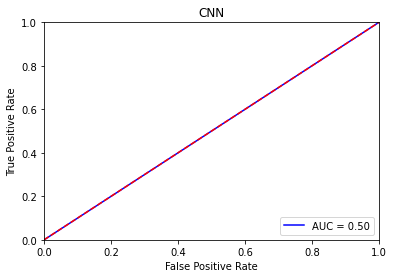

In [27]:
evaluate(y_test, y_pred)